<a href="https://colab.research.google.com/github/Abadi-kfupm/Student/blob/main/EM502Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Introduction
# Python coding is an easy and powerful tools for programming
# Can be obtained from Chatgpt, lierature or expert
# While coding, python predicts and suggests text and steps

In [ ]:
# Liberaries

In [ ]:
# Importing all required liberaries for this code
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import zscore

In [ ]:
# Dataset

In [ ]:
#Loding Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Abadi-kfupm/Student/refs/heads/main/cars_data')

In [ ]:
# Visualizing Four rows of dataset or df (for all)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Overall information about the size and categories of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Missing Data In each category
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# Remove duplicated values
df.drop_duplicates().shape[0]

299

In [ ]:
# Brief Statistical description of the numerical data columns
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Categorical Data

In [ ]:
# Disply The Fuel Types in column list
fuel_type = df['Fuel_Type']
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [ ]:
# Disply Seller Types in column list
seller_type = df['Seller_Type']
print(df['Seller_Type'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [ ]:
# Disply Transmision Types in column list
transmission_type = df['Transmission']
print(df['Transmission'].value_counts())


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# Disply Owner Types in column list
owner_type = df['Owner']
print(df['Owner'].value_counts())

Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [ ]:
# Categorical Data Visualization

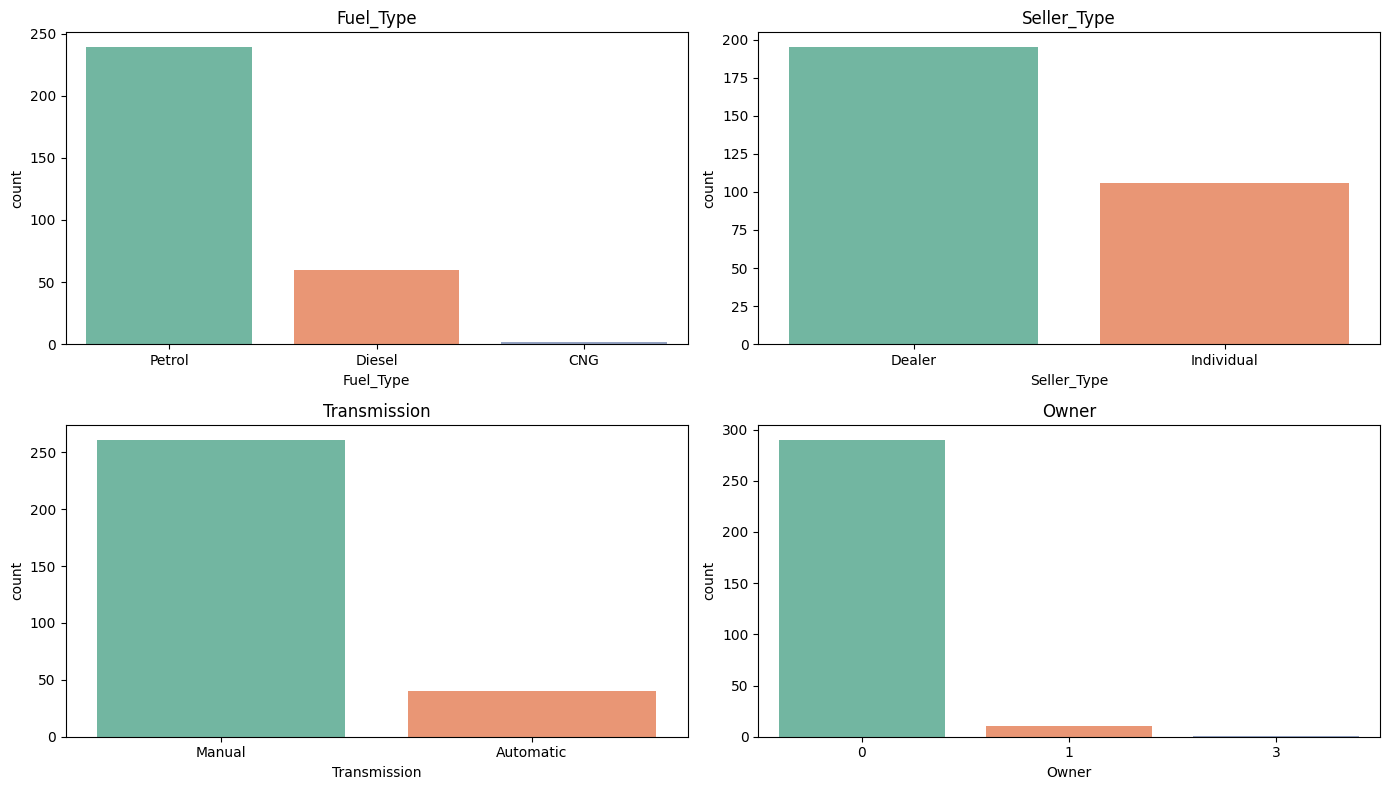

In [ ]:
# Visualization of Categorical Features using count plots
categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Create one figure with 4 subplots
fig = plt.figure(figsize=(14, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=categorical[i], data=df, hue=categorical[i], palette='Set2', legend=False)
    plt.title(categorical[i])

plt.tight_layout()
plt.show()

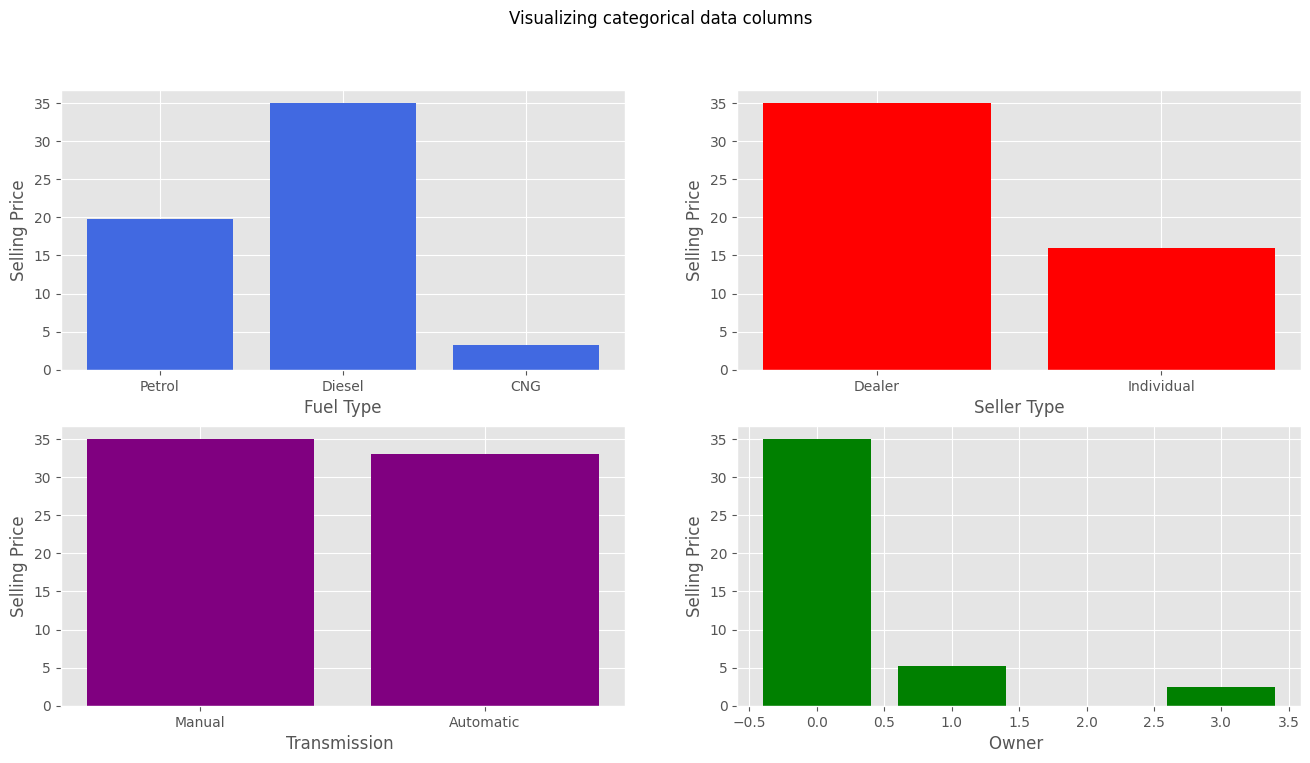

In [ ]:
# Visualizing categorical data columns ( Variation with The Selling Price will be considered for all attributes)

selling_price = df['Selling_Price']

from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(2, 2 , 1)
plt.bar(fuel_type, selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(2,2,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.subplot(2,2,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission ')
plt.ylabel("Selling Price")
plt.subplot(2,2,4)
plt.bar(owner_type, selling_price, color='green')
plt.xlabel('Owner ')
plt.ylabel("Selling Price")
plt.show()

In [ ]:
# Numerical Data Visualization

In [ ]:
# Distribution of Year Column

In [ ]:
# Histogram distribution skewing to the right (Most cars' brands were between 2013 and 2017)
# Box-plot outliers in early years
fig = px.histogram(df, x='Year', marginal='box', nbins=16,title='Brands of Same Year')
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
# Selling Price Distribution

In [ ]:
# Histogram distribution skewing to the left (Majority of cars were quoted at less than 6 units of Selling Price)
# Box-plot outliers in recent years (Manual)
fig = px.histogram(df, x='Selling_Price', marginal='box', color='Transmission', color_discrete_sequence=['green', 'grey'],
                   title=' Number of Cars With Same Selling Price ')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Present Price Ditribution

In [ ]:
#Histogram distribution skewing to the left (A gradual decrease in number of cars with higher Present Price)
# Box-plot outliers in most recent years
fig = px.histogram(df, x='Present_Price', marginal='box', color='Transmission',
                   color_discrete_sequence=['green', 'grey'], title='Number of Cars With Same Preset Price')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Kilometers Driven Distribution

In [ ]:
# Histogram distribution skewing to the left (Majority of cars were driven less than 100k)
# Box-plot outliers in the number of cars driven more than 100K
fig = px.histogram(df, x='Kms_Driven', marginal='box', color='Transmission',
                   color_discrete_sequence=['green', 'grey'], title='Number of Cars With Same Kilometers Driven')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Correlation with Selling Price

In [ ]:
# Year
# Scatter plot showing that mojority of recent cars had higher Selling Price
# Slightly Correlated
fig = px.scatter(df, x='Year', y='Selling_Price', opacity=0.9,
                 title='Selling Price vs. Year')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
# Correllation Coefficient (Year)
df.Selling_Price.corr(df.Year)

np.float64(0.23614098016042737)

In [ ]:
# Present Price
# Scatter plot showing that the Selling Price of most cars increasd when the Present Price increased
# Almost linear Correlation
fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs Present Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
# Correllation Coefficient(Present Price)
df.Selling_Price.corr(df.Present_Price)

np.float64(0.8789825451614951)

In [ ]:
# Correlation With Selling Price

In [ ]:
# Kilometers Driven
# Scatter plot showing that most of cars had Kms Driven lower than 100k with slight increase in Selling Price
# No clear correlation.

fig = px.scatter(df, x='Kms_Driven', y='Selling_Price', opacity=0.9,
                 title='Selling Price vs Kms Driven')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
# Correllation Coefficient (kms_Driven)
df.Selling_Price.corr(df.Kms_Driven)

np.float64(0.029187090674291236)

In [ ]:
# The degree of correlation between each two variables (attributes)

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


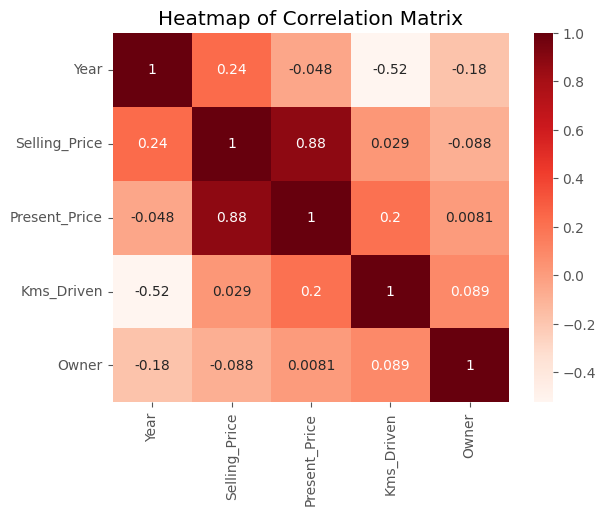

In [ ]:
# Heatmap represents the correlation matrix between each two variables
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Linear Regression

In [ ]:
# The input and output variables are defined
inputs = df[['Present_Price']]
outputs = df.Selling_Price
print(inputs)
print(outputs)

     Present_Price
0             5.59
1             9.54
2             9.85
3             4.15
4             6.87
..             ...
296          11.60
297           5.90
298          11.00
299          12.50
300           5.90

[301 rows x 1 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
# The testing data is 20% and the training data is 80%,
# Coded as follows:

inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)


In [ ]:
# Training Data
print(inputs_train)
print(outputs_train)

     Present_Price
184          0.750
132          0.950
194          0.787
75           6.800
111          1.500
..             ...
188          0.570
71          12.480
106          3.450
270         10.000
102          1.780

[240 rows x 1 columns]
184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [ ]:
# # Create and train the model using Python coding

model = LinearRegression()
model.fit(inputs,outputs)


LinearRegression()

In [ ]:
# Python Model Prediction (Programmed)
model_prediction = model.predict(inputs_test)

In [ ]:
# 80% Training Samples of Presnt Price as input data, column and index number
print(inputs_train)

     Present_Price
184          0.750
132          0.950
194          0.787
75           6.800
111          1.500
..             ...
188          0.570
71          12.480
106          3.450
270         10.000
102          1.780

[240 rows x 1 columns]


In [ ]:
# Corrosponding (80%) Selling Prices as output data, column and index number
print(outputs_train)

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [ ]:
# The best fit is defined in term of model (or regression relation) intercept and coefficients

# β1 (slope)
print(model.coef_)

# β0 (intercept)
print(model.intercept_)

[0.51684903]
0.7185274709817686


In [ ]:
# Predicted Selling Price with Single Linear Regresson Model
Model_Prediction = model.intercept_ + model.coef_[0] * inputs_test['Present_Price']

In [ ]:
# 20% Presnt Price Samples To Be Tested as input data, column and index number
print(inputs_test)

     Present_Price
177           0.57
289          13.60
228           9.40
198           0.57
60           18.61
..             ...
234           5.70
296          11.60
281           7.60
285           8.50
182           0.58

[61 rows x 1 columns]


In [ ]:
# Model Prediction (based on 20% input testing data)
print(Model_Prediction)

177     1.013131
289     7.747674
228     5.576908
198     1.013131
60     10.337088
         ...    
234     3.664567
296     6.713976
281     4.646580
285     5.111744
182     1.018300
Name: Present_Price, Length: 61, dtype: float64


In [ ]:
#  Actual Selling Prices ( the initial output of the 20% testing data)
print(outputs_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


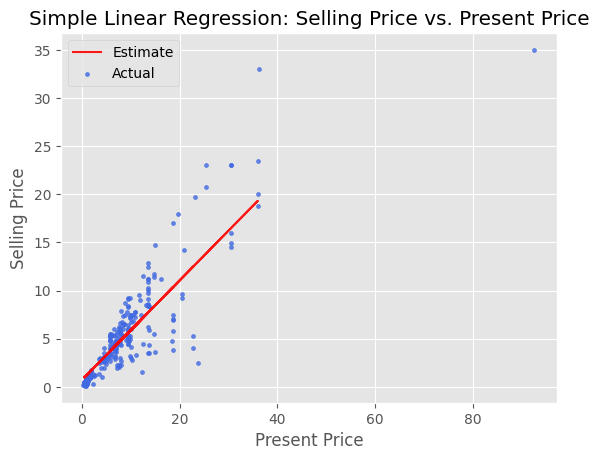

In [ ]:
# Visualizing the regression line
plt.plot(inputs_test.Present_Price, Model_Prediction, 'r', alpha=0.9)
outputs = df.Selling_Price
plt.scatter(df.Present_Price, outputs, color='royalblue', s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title("Simple Linear Regression: Selling Price vs. Present Price")
plt.legend(['Estimate', 'Actual'])


In [ ]:
# Evaluating the model

# We compare the predicted selling price with the actual selling price
#(which are corrosponding outputs to the presnt price test data used)
# The accuracy of the model is meassured by calculating the error as follows:

mae = mean_absolute_error(outputs_test, Model_Prediction)
rmse = np.sqrt(mean_squared_error(outputs_test, Model_Prediction))
r2 = r2_score(outputs_test, Model_Prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.7756517349034633
Root Mean Squared Error (RMSE): 2.674393858068127
R-squared (R2): 0.68950722731726


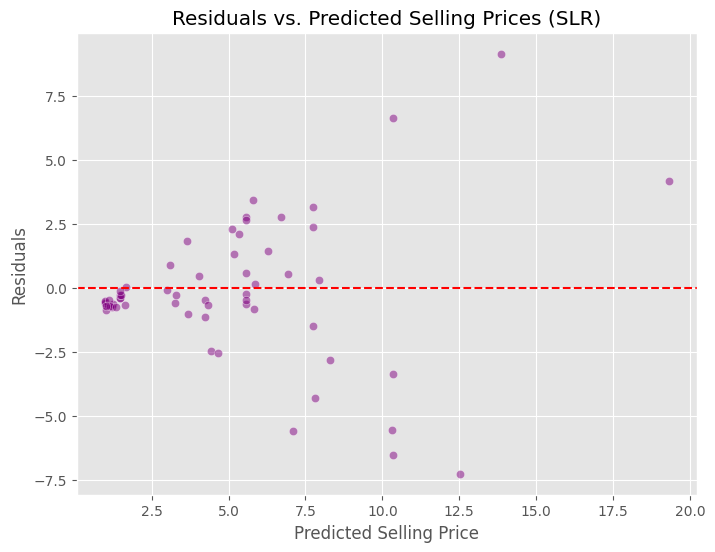

In [ ]:
# Residual Plot
residuals = outputs_test - Model_Prediction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model_Prediction, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Residuals vs. Predicted Selling Prices (SLR)')
plt.show()

In [ ]:
# Multible Linear Regression Model 1

In [ ]:
# Here more than one attribute (variable) will be considered
# The aim is to develop a linear relation to calculate the selling prices (as output data)
# The Year, Present Price and Kms_Driven ( as input data) in the model (or equation)
# The attributes repersent the first three columns in the dataset (and so are their coefficients)
# The effect of each variable will be added through its coefficients (β1, β2, β3) in the equation

In [ ]:
# Predict the selling price considering the numerical features (Year, Present_Price, Kms_Driven)
# Their order in the dataset is important

In [ ]:
inputs1 = df[['Year','Present_Price','Kms_Driven']]
outputs1 = df.Selling_Price
print(inputs1)
print(outputs1)

     Year  Present_Price  Kms_Driven
0    2014           5.59       27000
1    2013           9.54       43000
2    2017           9.85        6900
3    2011           4.15        5200
4    2014           6.87       42450
..    ...            ...         ...
296  2016          11.60       33988
297  2015           5.90       60000
298  2009          11.00       87934
299  2017          12.50        9000
300  2016           5.90        5464

[301 rows x 3 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
# The inputs and Outputs data will be divided into training and testing sets
# Training (to find the coeffients) and testing (to see the prediction accuracy)
# Example split the data into (80% Training and 20% Testing)
# Using Python coding (i.e text prediction and suggestion ) as follows:

inputs1_train, inputs1_test, outputs1_train, outputs1_test = train_test_split(inputs1, outputs1, test_size=0.2, random_state=42)

In [ ]:
# Training Data
print(inputs1_train)
print(outputs1_train)

     Year  Present_Price  Kms_Driven
184  2008          0.750       26000
132  2017          0.950        3500
194  2008          0.787       50000
75   2015          6.800       36000
111  2016          1.500        8700
..    ...            ...         ...
188  2013          0.570       18000
71   2011         12.480       45000
106  2014          3.450       16500
270  2011         10.000       69341
102  2017          1.780        4000

[240 rows x 3 columns]
184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [ ]:
# Create and train the model using Python coding (i.e text prediction and suggestion )
mlr_model1 = LinearRegression()
mlr_model1.fit(inputs1_train, outputs1_train)

LinearRegression()

In [ ]:
# Python Model Prediction (Programmed)
model1_prediction = mlr_model1.predict(inputs1_test)
# Alternatively the manual prediction through the regression relation can be used

In [ ]:
# Model Coefficients and Intercept
print(mlr_model1.coef_)
print(mlr_model1.intercept_)

[ 4.43962472e-01  5.15430469e-01 -7.45847218e-07]
-893.1959328776992


In [ ]:
# The multible regression model (or by following python text prediction and suggestion) is given by :
Model1_Predict = mlr_model1.intercept_ + mlr_model1.coef_[0] * inputs1_test['Year'] + mlr_model1.coef_[1] *  inputs1_test['Present_Price'] + mlr_model1.coef_[2] * inputs1_test['Kms_Driven']

In [ ]:
# Input testing data (20%) with their columns and index number
print(inputs1_test)

     Year  Present_Price  Kms_Driven
177  2016           0.57       24000
289  2016          13.60       10980
228  2012           9.40       60000
198  2011           0.57       35000
60   2013          18.61       40001
..    ...            ...         ...
234  2015           5.70        4492
296  2016          11.60       33988
281  2006           7.60       50456
285  2016           8.50       15059
182  2013           0.58       30000

[61 rows x 3 columns]


In [ ]:
# Model Prediction (based on 20% input testing data) with input data, column and index number
print(Model1_Predict)

177     2.108305
289     8.834075
228     4.856855
198    -0.119712
60     10.062849
         ...    
234     4.323051
296     7.786053
281     1.272424
285     6.202337
182     0.777097
Length: 61, dtype: float64


In [ ]:
# The actual output testing data of Selling Price with input data, column and index number
print(outputs1_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [ ]:
# Evaluating the model

mae1 = mean_absolute_error(outputs1_test, Model1_Predict)
rmse1 = np.sqrt(mean_squared_error(outputs1_test, Model1_Predict))
r2_1 = r2_score(outputs1_test, Model1_Predict)

print(f"Mean Absolute Error (MAE): {mae1}")
print(f"Root Mean Squared Error (RMSE): {rmse1}")
print(f"R-squared (R2): {r2_1}")

Mean Absolute Error (MAE): 1.3638305462401648
Root Mean Squared Error (RMSE): 2.00263676943193
R-squared (R2): 0.8258974489339233


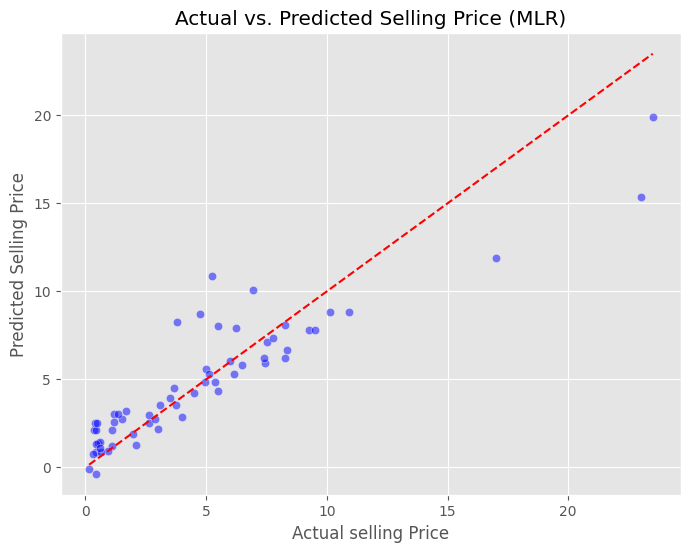

In [ ]:
# Scatter plot of Actual vs. Predicted Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outputs1_test, y= Model1_Predict, color='blue', alpha=0.5)
plt.plot([outputs1_test.min(), outputs1_test.max()], [outputs1_test.min(), outputs1_test.max()], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price (MLR)')
plt.show()

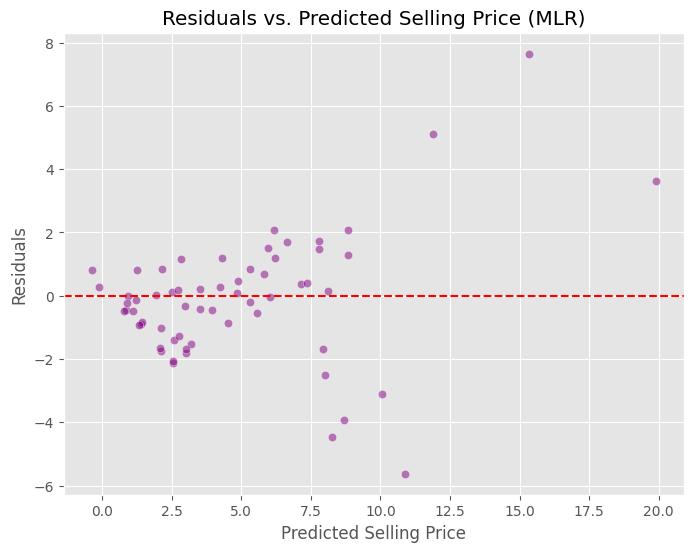

In [ ]:
# Residual Plot
residuals = outputs1_test - Model1_Predict
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model1_Predict, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Residuals vs. Predicted Selling Price (MLR)')
plt.show()

In [ ]:
# Multible Linear Regression Model 2

In [ ]:
# Reperent the categorical features with numerical values

if 'Car_Name' in df.columns:
    df.drop(columns=['Car_Name'], inplace=True)  # Car name is categorical and non-numeric

In [ ]:
# Replace the Categorical ordinal features into numerical

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Create a dictionary to store encoders
label_encoders = {}

# Encode categorical variables
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
# Predict The Selling Price Considering all Features

inputs2 = df.drop(columns=['Selling_Price'])  # Features
outputs2= df['Selling_Price']  # Target variable

print(inputs2)
print(outputs2)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
# The inputs and Outputs data are divided into 80% training and 20% testing sets

inputs2_train, inputs2_test, outputs2_train, outputs2_test = train_test_split(inputs2, outputs2, test_size=0.2, random_state=42)


In [ ]:
# Training Data (80% 0t input and out of dataset considered)
print(inputs2_train)
print(outputs2_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
184  2008          0.750       26000          2            1             1   
132  2017          0.950        3500          2            1             1   
194  2008          0.787       50000          2            1             1   
75   2015          6.800       36000          2            0             1   
111  2016          1.500        8700          2            1             1   
..    ...            ...         ...        ...          ...           ...   
188  2013          0.570       18000          2            1             1   
71   2011         12.480       45000          1            0             1   
106  2014          3.450       16500          2            1             1   
270  2011         10.000       69341          2            0             1   
102  2017          1.780        4000          2            1             1   

     Owner  
184      1  
132      0  
194      0  
75       0 

In [ ]:
# Create and train the model

mlr_model2 = LinearRegression()
mlr_model2.fit(inputs2_train, outputs2_train)

LinearRegression()

In [ ]:
# Python Model Prediction (Programmed)
model2_prediction = mlr_model2.predict(inputs2_test)

In [ ]:
# Model Coefficients and Intercept
print(mlr_model2.coef_)
print(mlr_model2.intercept_)

[ 3.63622678e-01  4.39942393e-01 -5.46717653e-06 -1.32389894e+00
 -1.16866879e+00 -1.63644708e+00 -9.20154941e-01]
-726.3997031143311


In [ ]:
# Input testing data (20%) with their columns and index number
print(inputs2_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
177  2016           0.57       24000          2            1             0   
289  2016          13.60       10980          2            0             1   
228  2012           9.40       60000          1            0             1   
198  2011           0.57       35000          2            1             1   
60   2013          18.61       40001          2            0             1   
..    ...            ...         ...        ...          ...           ...   
234  2015           5.70        4492          2            0             1   
296  2016          11.60       33988          1            0             1   
281  2006           7.60       50456          2            0             1   
285  2016           8.50       15059          2            0             0   
182  2013           0.58       30000          2            1             1   

     Owner  
177      0  
289      0  
228      0  
198      1 

In [ ]:
#
Model2_Predict = mlr_model2.intercept_ + mlr_model2.coef_[0] * inputs2_test['Year'] + mlr_model2.coef_[1] *  inputs2_test['Present_Price'] + mlr_model2.coef_[2] * inputs2_test['Kms_Driven']+ mlr_model2.coef_[3] * inputs2_test['Fuel_Type'] + mlr_model2.coef_[4] * inputs2_test['Seller_Type'] + mlr_model2.coef_[5] * inputs2_test['Transmission'] + mlr_model2.coef_[6] * inputs2_test['Owner'] #A Regression Model Equqtion for Manual Calculation

In [ ]:
# Model Prediction (based on 20% input testing data)
print(Model2_Predict)

177    2.966705
289    8.302558
228    6.056208
198   -1.468150
60     9.257139
         ...   
234    4.498862
296    8.620784
281    1.810855
285    7.672999
182    0.210986
Length: 61, dtype: float64


In [ ]:
# The actual output testing data of Selling Price as output data, column and index number
print(outputs2_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [ ]:
# Evaluating the model

mae2 = mean_absolute_error(outputs2_test, Model2_Predict)
rmse2 = np.sqrt(mean_squared_error(outputs2_test, Model2_Predict))
r2_2 = r2_score(outputs2_test, Model2_Predict)

print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print(f"R-squared (R2): {r2_2}")

Mean Absolute Error (MAE): 1.22176154623344
Root Mean Squared Error (RMSE): 1.878543918542874
R-squared (R2): 0.8468053957655791


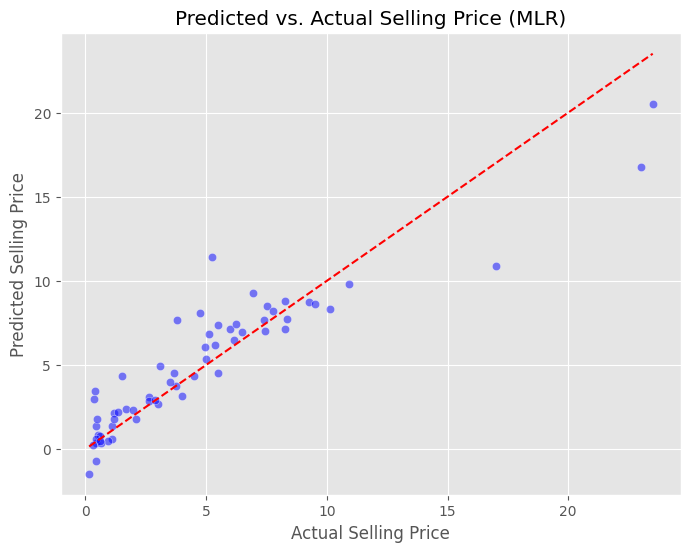

In [ ]:
# Scatter plot of Predicted vs. Actual Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outputs2_test, y= Model2_Predict, color='blue', alpha=0.5)
plt.plot([outputs2_test.min(), outputs2_test.max()], [outputs2_test.min(), outputs2_test.max()], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs. Actual Selling Price (MLR)')
plt.show()

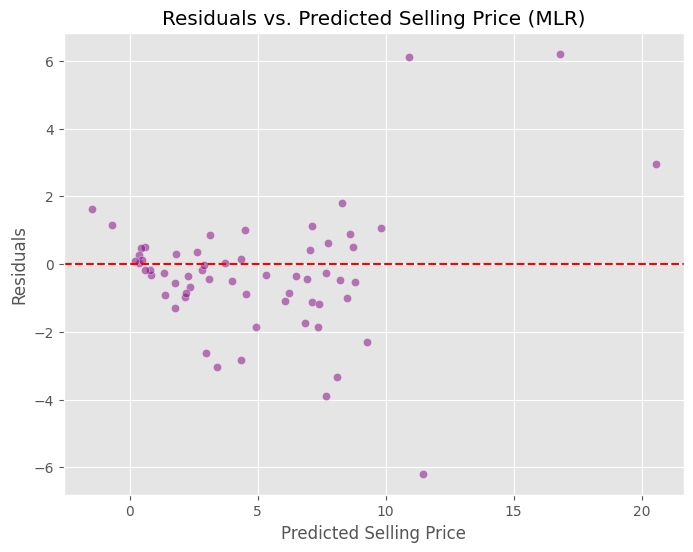

In [ ]:
# Residual Plot
residuals = outputs2_test - Model2_Predict
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model2_Predict, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Residuals vs. Predicted Selling Price (MLR)')
plt.show()

In [ ]:
# Example from dataset index 177 (same feature order as inputs2_test)
inputs2_test = np.array([[2016, 0.57, 24000, 2, 1, 0, 0]])  # as a 2D array
model2_prediction = mlr_model2.predict(inputs2_test)
# Actual selling price (2.967)
print(f"Predicted Selling Price: Thousand(£){model2_prediction[0]:.2f}")

Predicted Selling Price: Thousand(£)2.97


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Example with a random data (same feature order as input and output data)
inputs2_test = np.array([[2025, 10, 0, 2, 0, 1, 0]])  # as a 2D array
model2_prediction = mlr_model2.predict(inputs2_test)
# Actual selling price (?)
print(f"Predicted Selling Price: Thousand(£){model2_prediction[0]:.2f}")

Predicted Selling Price: Thousand(£)10.05


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

